In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"likithakyama","key":"15c0f788e05291978ca615ad6e6d7c8b"}'}

In [2]:
!pip install -q kaggle

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d brendan45774/test-file

Dataset URL: https://www.kaggle.com/datasets/brendan45774/test-file
License(s): CC0-1.0


In [5]:
!unzip /content/test-file.zip

Archive:  /content/test-file.zip
  inflating: tested.csv              


**Data preprocessing**





In [6]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_csv("/content/tested.csv")

In [8]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [9]:
print("no of passengers in original data:"+str(len(data.index)))

no of passengers in original data:418


**Exploratory data analysis**


<Axes: xlabel='Survived', ylabel='count'>

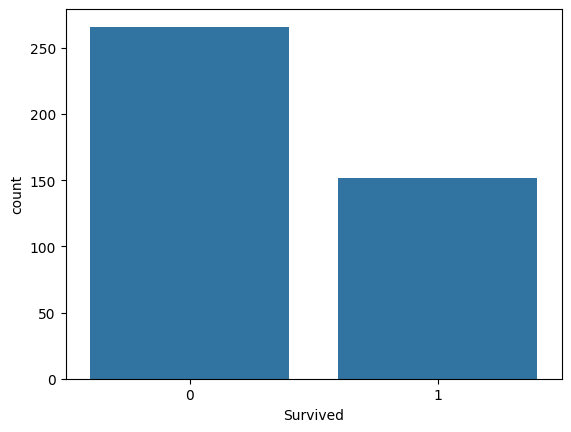

In [10]:
sns.countplot(x="Survived",data=data)

<Axes: xlabel='Survived', ylabel='count'>

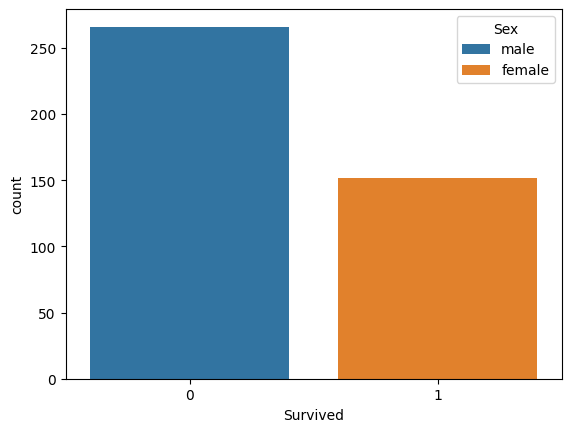

In [11]:
sns.countplot(x="Survived",hue="Sex",data=data)


<Axes: xlabel='Survived', ylabel='count'>

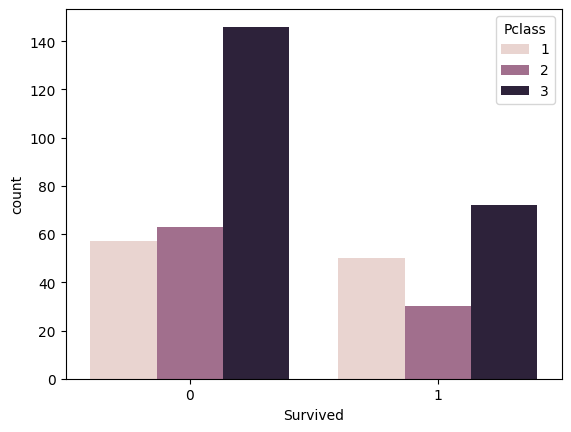

In [12]:
sns.countplot(x="Survived",hue="Pclass",data=data)


<Axes: ylabel='Frequency'>

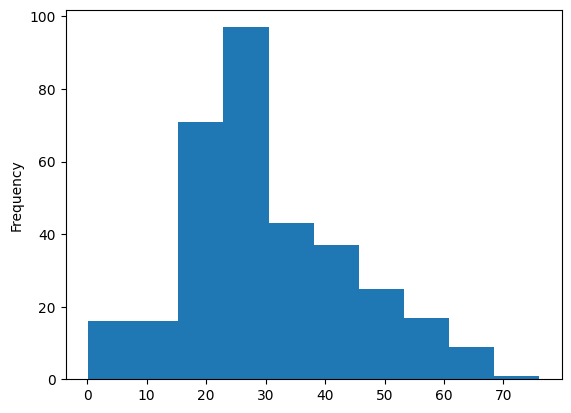

In [13]:
data["Age"].plot.hist()

<Axes: xlabel='Pclass', ylabel='Fare'>

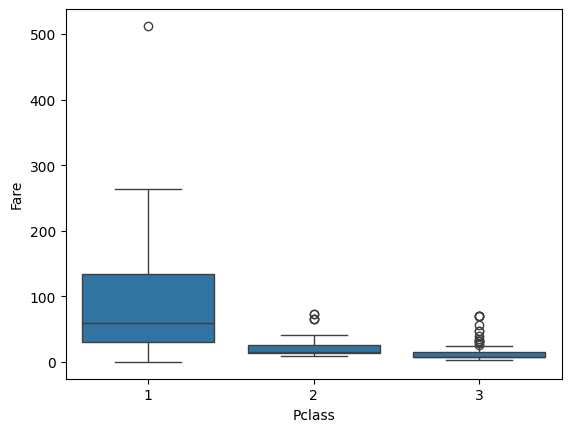

In [14]:
sns.boxplot(x="Pclass",y="Fare",data=data)

<Axes: >

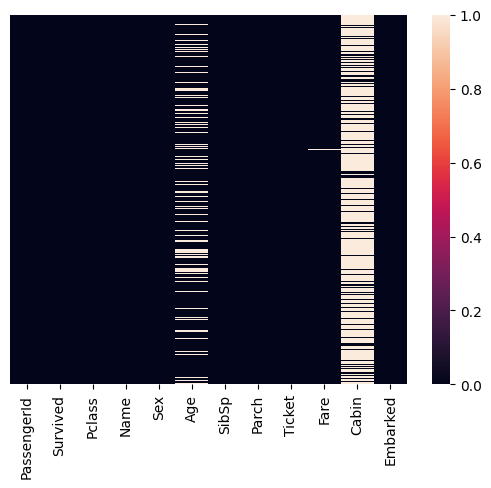

In [15]:
sns.heatmap(data.isnull(),yticklabels=False)

In [16]:
data.drop("Cabin",axis=1,inplace=True)

In [17]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [18]:
data.dropna(inplace=True )

In [19]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q


In [20]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [21]:
pd.get_dummies(data['Age'])

,0.17,0.33,0.75,0.83,0.92,1.00,2.00,3.00,5.00,6.00,...,57.00,58.00,59.00,60.00,61.00,62.00,63.00,64.00,67.00,76.00
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
414,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
Age=pd.get_dummies(data['Age'],drop_first=True)


In [23]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [24]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [25]:
data.drop(['Sex','Ticket','Embarked','Name'],axis=1,inplace=True)

In [26]:
x=data.drop("Survived",axis=1)

In [27]:
y=data['Survived'].values

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [29]:
x_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare
330,1222,2,48.0,0,2,36.7500
177,1069,1,54.0,1,0,55.4417
375,1267,1,45.0,0,0,262.3750
1,893,3,47.0,1,0,7.0000
309,1201,3,45.0,1,0,14.1083
...,...,...,...,...,...,...
405,1297,2,20.0,0,0,13.8625
241,1133,2,45.0,0,2,30.0000
145,1037,3,31.0,3,0,18.0000
56,948,3,35.0,0,0,7.8958


In [30]:
y_train

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

**Logistic Regression**


In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
predictions=logmodel.predict(x_test)

In [34]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.62      0.85      0.72        39\n           1       0.57      0.29      0.38        28\n\n    accuracy                           0.61        67\n   macro avg       0.60      0.57      0.55        67\nweighted avg       0.60      0.61      0.58        67\n'

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test,predictions)

array([[33,  6],
       [20,  8]])

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
 accuracy_score(y_test,predictions)

0.6119402985074627

**DecisionTree  Classifier**

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
predictions=decision_tree.predict(x_test)


In [42]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.56      0.49      0.52        39\n           1       0.39      0.46      0.43        28\n\n    accuracy                           0.48        67\n   macro avg       0.48      0.48      0.47        67\nweighted avg       0.49      0.48      0.48        67\n'

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_test,predictions)


array([[19, 20],
       [15, 13]])

In [45]:
from sklearn.metrics import accuracy_score


In [46]:
 accuracy_score(y_test,predictions)


0.47761194029850745

**Random Forest Classifier**


In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)


RandomForestClassifier()

In [49]:
y_pred=random_forest.predict(x_test)

In [50]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.56      0.49      0.52        39\n           1       0.39      0.46      0.43        28\n\n    accuracy                           0.48        67\n   macro avg       0.48      0.48      0.47        67\nweighted avg       0.49      0.48      0.48        67\n'

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[19, 20],
       [15, 13]])

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.47761194029850745